<a href="https://colab.research.google.com/github/tanjinadnanabir/Machine-Learning-Zoomcamp-2025/blob/main/HW_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - 2: Regression

### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-05 10:02:46--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.03s   

2025-10-05 10:02:46 (29.6 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [3]:
df = pd.read_csv('/content/car_fuel_efficiency.csv')
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


### Preparing the dataset

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

In [4]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?

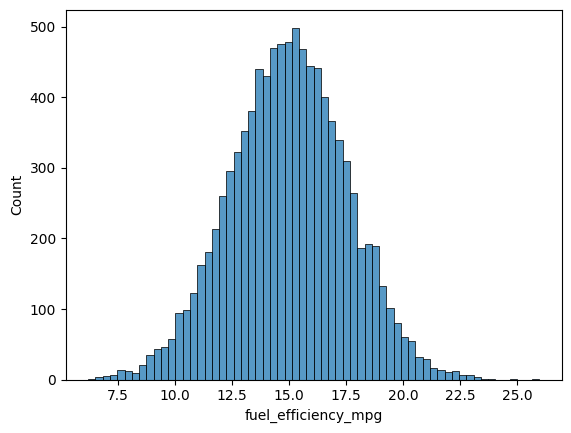

In [5]:
sns.histplot(df['fuel_efficiency_mpg'])
plt.show()

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`

In [6]:
df.isnull().sum()

,0
engine_displacement,0
horsepower,708
vehicle_weight,0
model_year,0
fuel_efficiency_mpg,0


### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199



In [7]:
df['horsepower'].median()

149.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [11]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)

n_train = n - n_val - n_test

In [12]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [13]:
num_rows= df.shape[0]
num_rows

9704

In [14]:
num_rows * 0.6

5822.4

In [15]:
num_rows * 0.2

1940.8000000000002

In [16]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [17]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [18]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_val.fuel_efficiency_mpg.values

In [19]:
y_train.shape

(5824,)

In [20]:
df_train.shape

(5824, 5)

In [21]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [22]:
def train_linear_regression(X, y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0],w_full[1:]

In [23]:
def prepare_X(df,fillna_value):
  df = df.fillna(fillna_value)
  X = df.values
  return X

In [24]:
def rmse(y, y_pred):
  error = y -y_pred
  se = error ** 2
  mse = se.mean()
  return np.sqrt(mse)

In [25]:
X_train = prepare_X(df_train,fillna_value=0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=0)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

np.float64(0.52)

In [26]:
mean = df_train.horsepower.mean()

X_train = prepare_X(df_train,fillna_value=mean)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, fillna_value=mean)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
round(score, 2)

np.float64(0.46)

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [28]:
def train_linear_regression_reg(X, y, r=0):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones, X])

  XTX = X.T.dot(X)
  XTX = XTX + r * np.eye(XTX.shape[0])

  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0],w_full[1:]

In [29]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train,fillna_value=0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w0 + X_val.dot(w)

    score =rmse(y_val, y_pred)

    print(r, w0, round(score, 4))

0 28.82736547365895 0.5174
0.01 24.92683841981215 0.5171
0.1 11.239661084581073 0.5188
1 1.7315979411219746 0.5222
5 0.3638075020482907 0.5229
10 0.18306246621686947 0.523
100 0.01841801730688404 0.5231


### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different.
> If standard deviation of scores is low, then our model is *stable*.

In [30]:
def run_experiment(df, idx, n_train, n_val, seed):

    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)

    n_train = n - n_val - n_test

    idx = np.arange(n)

    np.random.seed(seed)

    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
    df_val   = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test  = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val   = df_val.fuel_efficiency_mpg.values
    y_test  = df_test.fuel_efficiency_mpg.values

    df_train = df_train.drop(columns=["fuel_efficiency_mpg"])
    df_val   = df_val.drop(columns=["fuel_efficiency_mpg"])
    df_test  = df_test.drop(columns=["fuel_efficiency_mpg"])

    X_train = prepare_X(df_train, fillna_value=0)
    w0, w   = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, fillna_value=0)
    y_pred = w0 + X_val.dot(w)

    return rmse(y_val, y_pred)

seeds = list(range(10))
rmses = [run_experiment(df, idx.copy(), n_train, n_val, s) for s in seeds]

print("RMSEs:", rmses)

RMSEs: [np.float64(0.5206531296294218), np.float64(0.521338891285577), np.float64(0.5228069974803171), np.float64(0.515951674119676), np.float64(0.5109129460053851), np.float64(0.52834064601107), np.float64(0.5313910658146311), np.float64(0.5090670387381733), np.float64(0.5147399129511132), np.float64(0.5131865908224594)]


In [31]:
std_rmse = np.std(rmses)
std_rmse

np.float64(0.006989446426433706)

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`.
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

In [33]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)

n_train = n - n_val - n_test

idx = np.arange(n)

np.random.seed(9)

np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val   = df.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test  = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val   = df_val.fuel_efficiency_mpg.values
y_test  = df_test.fuel_efficiency_mpg.values

df_train = df_train.drop(columns=["fuel_efficiency_mpg"])
df_val   = df_val.drop(columns=["fuel_efficiency_mpg"])
df_test  = df_test.drop(columns=["fuel_efficiency_mpg"])

df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

In [34]:
X_full_train = prepare_X(df_full_train, fillna_value=0)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, fillna_value=0)
y_pred = w0 + X_test.dot(w)

round(rmse(y_test, y_pred), 4)

np.float64(0.5156)